**Problem Statement**

**You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.**

In [29]:
#importing Libraries
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
#importing dataset
df = pd.read_csv("Mall_Customers.csv")

In [31]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Data contains no missing values**

**EDA**

In [34]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


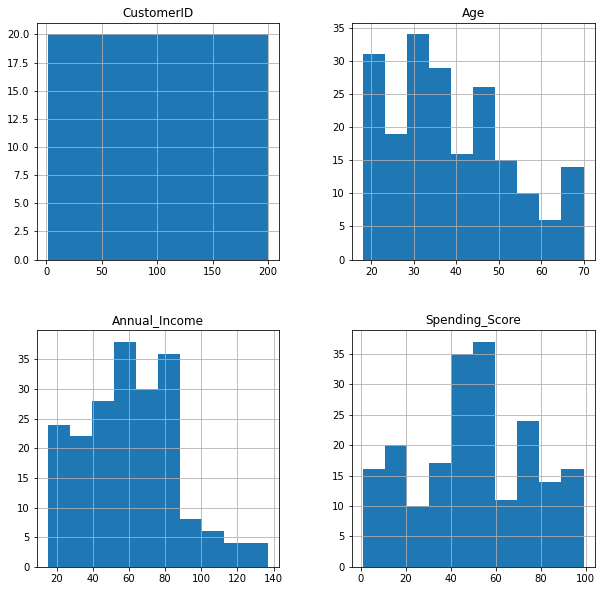

In [35]:
df.hist(figsize=(10,10))
plt.show()

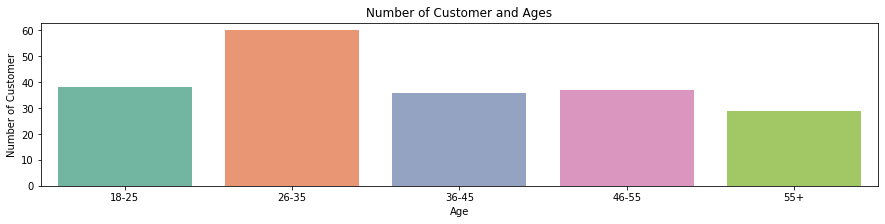

In [36]:
#plotting a bar plot for different age Groups
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,3))
sns.barplot(x=x, y=y,palette="Set2")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

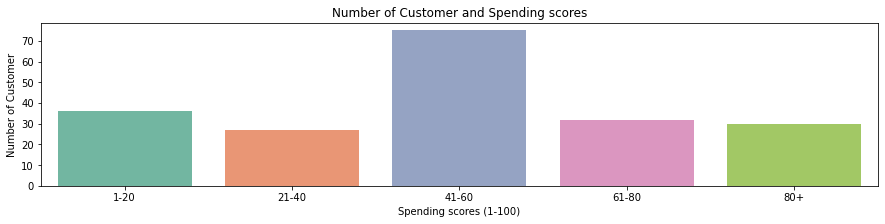

In [37]:
SS1_20 = df.Spending_Score[(df.Spending_Score <= 20) & (df.Spending_Score >= 1)]
SS21_40 = df.Spending_Score[(df.Spending_Score <= 40) & (df.Spending_Score >= 21)]
SS41_60 = df.Spending_Score[(df.Spending_Score <= 60) & (df.Spending_Score >= 41)]
SS61_80 = df.Spending_Score[(df.Spending_Score <= 80) & (df.Spending_Score >= 61)]
SS80above = df.Spending_Score[df.Spending_Score >= 80]

x = ["1-20","21-40","41-60","61-80","80+"]
y = [len(SS1_20.values),len(SS21_40.values),len(SS41_60.values),len(SS61_80.values),len(SS80above.values)]

plt.figure(figsize=(15,3))
sns.barplot(x=x, y=y,palette="Set2")
plt.title("Number of Customer and Spending scores")
plt.xlabel("Spending scores (1-100)")
plt.ylabel("Number of Customer")
plt.show()

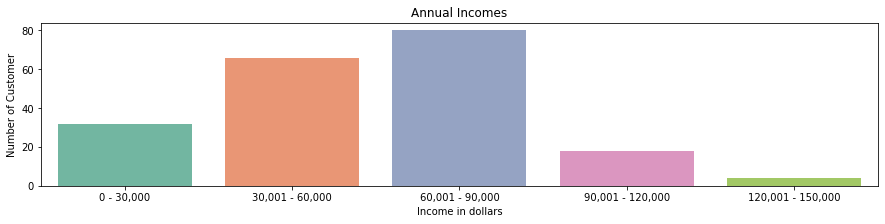

In [38]:
income0_30 = df["Annual_Income"][(df["Annual_Income"] >= 0) & (df["Annual_Income"] <= 30)]
income31_60 = df["Annual_Income"][(df["Annual_Income"] >= 31) & (df["Annual_Income"] <= 60)]
income61_90 = df["Annual_Income"][(df["Annual_Income"] >= 61) & (df["Annual_Income"] <= 90)]
income91_120 = df["Annual_Income"][(df["Annual_Income"] >= 91) & (df["Annual_Income"] <= 120)]
income121_150 = df["Annual_Income"][(df["Annual_Income"] >= 121) & (df["Annual_Income"] <= 150)]

x = ["0 - 30,000", "30,001 - 60,000", "60,001 - 90,000", "90,001 - 120,000", "120,001 - 150,000"]
y = [len(income0_30.values), len(income31_60.values), len(income61_90.values), len(income91_120.values), len(income121_150.values)]

plt.figure(figsize=(15,3))
sns.barplot(x=x, y=y, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income in dollars")
plt.ylabel("Number of Customer")
plt.show()

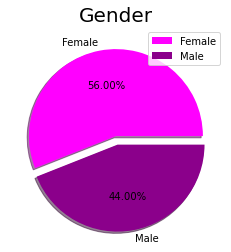

In [39]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['magenta', 'darkmagenta']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
#sns.countplot(df["Gender"], palette="bone")
#plt.show()

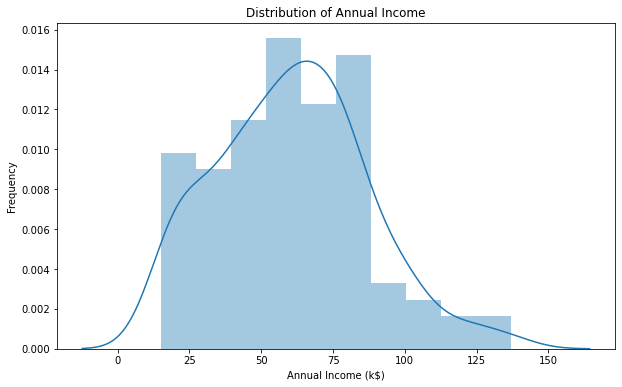

In [40]:
plt.figure(figsize=(10,6))
sns.distplot(df["Annual_Income"])
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

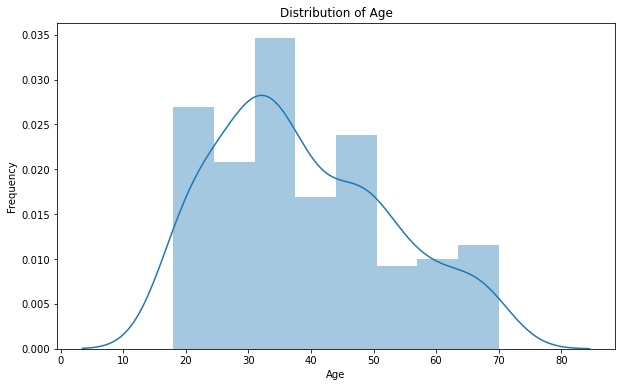

In [41]:
plt.figure(figsize=(10,6))
sns.distplot(df["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

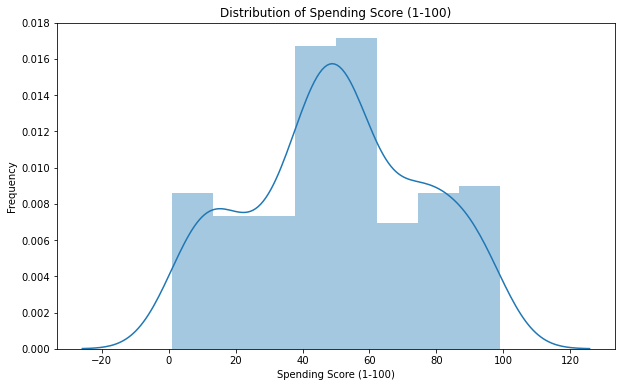

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(df["Spending_Score"])
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

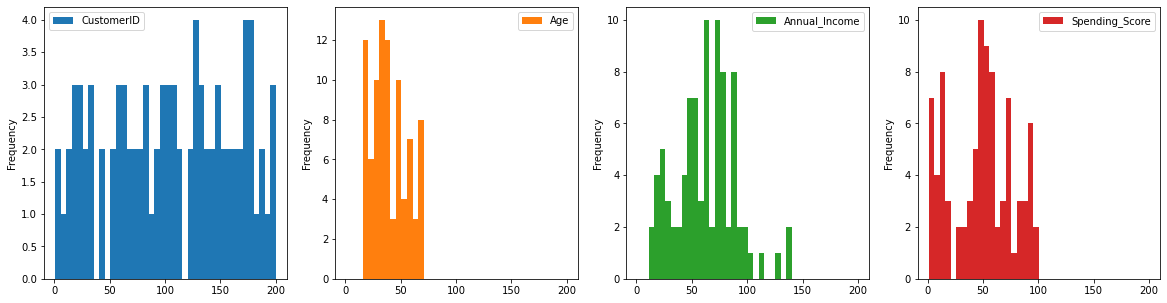

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sdat = df.groupby('Gender')
sdat.get_group("Male").plot(kind='hist', ax=ax, subplots=True, bins=40)
plt.show()

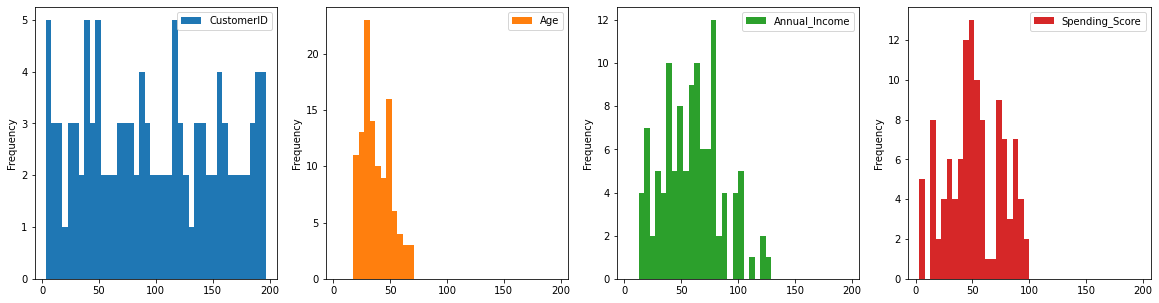

In [44]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sdat = df.groupby('Gender')
sdat.get_group("Female").plot(kind='hist', ax=ax, subplots=True, bins=40)
plt.show()

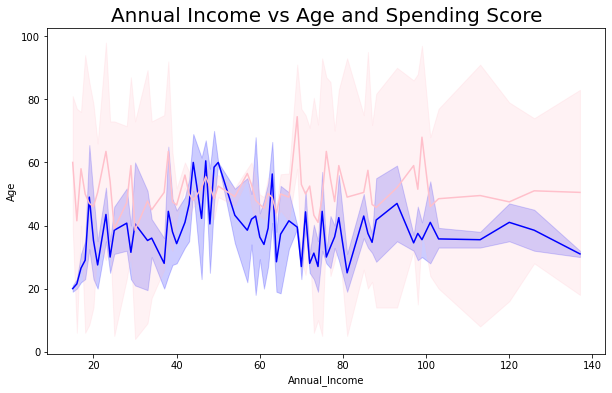

In [45]:
x = df['Annual_Income']
y = df['Age']
z = df['Spending_Score']
plt.figure(figsize=(10,6))
sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

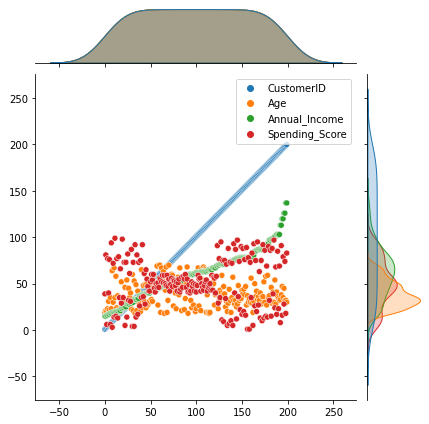

In [46]:
sns.jointplot(data=df)
plt.show()

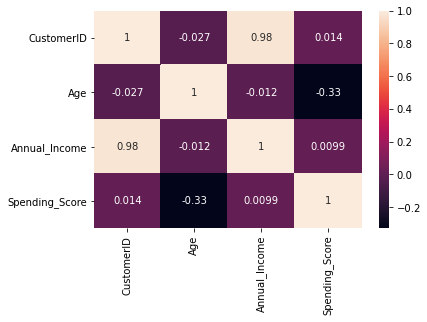

In [47]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**Model Fitting and predicting**

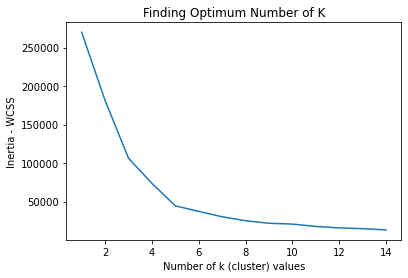

In [48]:
x_df = df.drop(['CustomerID','Gender','Age'],axis=1) 
wcss = []
for k in range(1,15):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(x_df)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,15), wcss)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()


In [49]:
kmean_x_data1 = KMeans(n_clusters=5, random_state=0)
clusters = kmean_x_data1.fit_predict(x_df)
df["Label"] = clusters
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


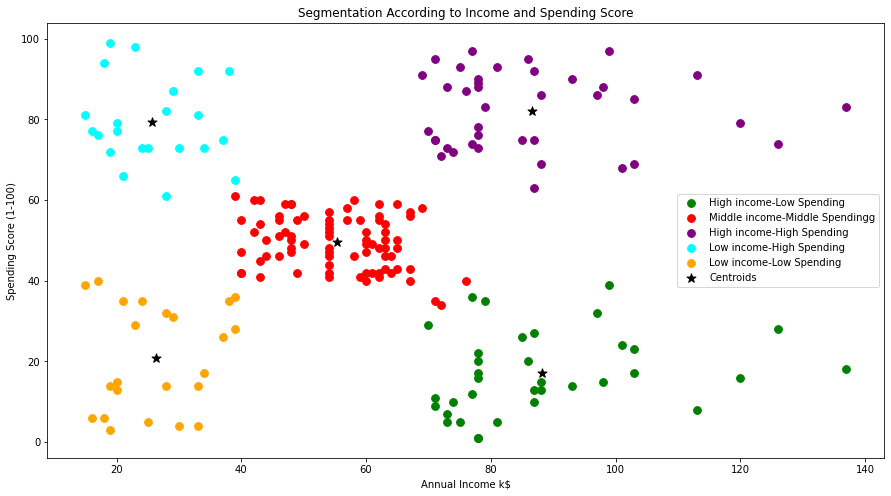

In [54]:
fig = plt.figure(figsize=(15,8))
plt.scatter(df["Annual_Income"][df.Label == 0], df["Spending_Score"][df.Label == 0],color = "green", label = "High income-Low Spending", s=60)
plt.scatter(df["Annual_Income"][df.Label == 1], df["Spending_Score"][df.Label == 1],color = "red", label = "Middle income-Middle Spendingg", s=60)
plt.scatter(df["Annual_Income"][df.Label == 2], df["Spending_Score"][df.Label == 2],color = "purple", label = "High income-High Spending", s=60)
plt.scatter(df["Annual_Income"][df.Label == 3], df["Spending_Score"][df.Label == 3],color = "cyan", label = "Low income-High Spending", s=60)
plt.scatter(df["Annual_Income"][df.Label == 4], df["Spending_Score"][df.Label == 4],color = "orange", label = "Low income-Low Spending", s=60)
plt.scatter(kmean_x_data1.cluster_centers_[:,0], kmean_x_data1.cluster_centers_[:,1], color="black", label="Centroids",s =90,marker='*')
plt.xlabel("Annual Income k$")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.title("Segmentation According to Income and Spending Score")
plt.show()

In [55]:
x = df.iloc[:,2:].values

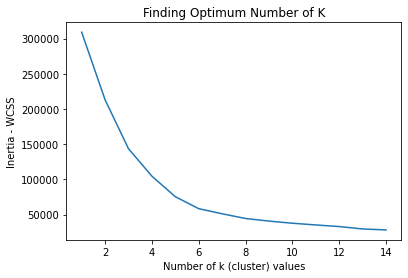

In [56]:
wcss = []
for k in range(1,15):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,15), wcss)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

In [57]:
kmean_x_data2 = KMeans(n_clusters=4, random_state=0)
clusters = kmean_x_data2.fit_predict(x)
df["label"] = clusters
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Label,label
0,1,Male,19,15,39,4,3
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,4,2


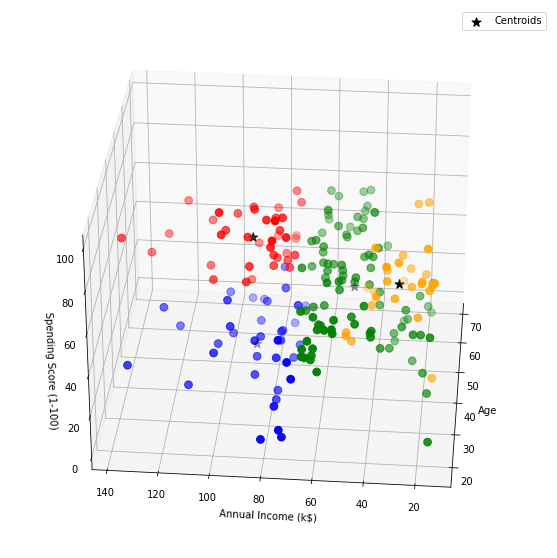

In [67]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual_Income"][df.label == 0], df["Spending_Score"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual_Income"][df.label == 1], df["Spending_Score"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual_Income"][df.label == 2], df["Spending_Score"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual_Income"][df.label == 3], df["Spending_Score"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual_Income"][df.label == 4], df["Spending_Score"][df.label == 4], c='purple', s=60)
ax.scatter(kmean_x_data2.cluster_centers_[:,0], kmean_x_data2.cluster_centers_[:,1],kmean_x_data2.cluster_centers_[:,2],kmean_x_data2.cluster_centers_[:,3],color="black", label="Centroids",marker='*',s =90)
ax.view_init(30, 185)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()
